# econstruction of Pleistocene climate based on mammal assemblages

Originally written for the Natuurkunde course in BSc in Geosciences programme

* Project: Emilia Jarochowska and Wilma Wessels
* This example solution: Alraune Zech with additions by Emilia Jarochowska

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read in data from the provided Table 2 of vole proportions:

In [2]:
table2 = "./data/Table2.csv"
data4names = np.genfromtxt(table2, delimiter = ',',names = True)
names = list(data4names.dtype.names)
data = np.genfromtxt(table2, delimiter = ',', skip_header = 1)

layer = data[:,0]
age = data[:,1]
data_sum_rel = np.cumsum(data[:,2:],axis = 1)

Check if the data imported correctly, get familiar with the structure of the data:

In [3]:
print(names)
print(data)
print(data.shape)
print(np.sum(data[:,2:],axis=1))

## 1. Analysis of microfossil remains
### 1.1 Vole assemblages

#### Area chart for sediment layers

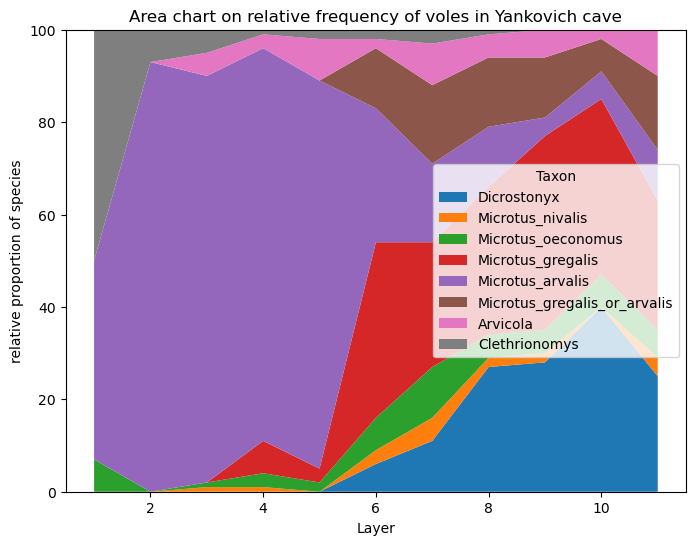

In [4]:
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of voles in Yankovich cave')
plt.legend(names[2:],loc = 'center right',title = 'Taxon')

#### Area chart for ages

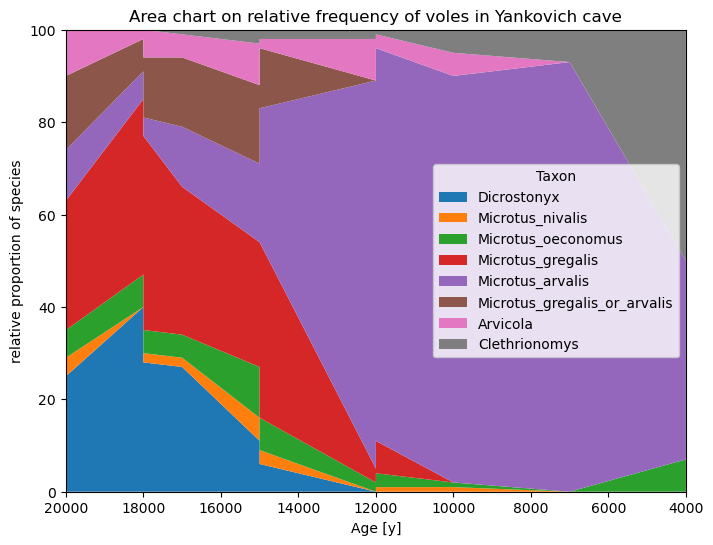

In [5]:
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.xlabel('Age [y]')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of voles in Yankovich cave')
plt.legend(names[2:],loc = 'center right',title = 'Taxon')

### 1.2 Biotope reconstruction

In [6]:
table2_biotopes = "./data/Table2_biotopes.csv"
biotopes  = ['Layer','Age','tundra', 'dry_grassland',	'wet_areas', 'open_grassland',	'tundra_open_grassland', 'lakes_rivers', 'covered_soil']

In [7]:
# create adapted version of Table 2 for biotopes including summation of similar biotopes
data_biotopes = np.copy(data[:,:])
data_biotopes[:,2] += data_biotopes[:,5]
data_biotopes = np.delete(data_biotopes,5, axis=1)
np.savetxt(table2_biotopes,data_biotopes, delimiter = ',', header = ','.join(str(e) for e in biotopes))


In [8]:
# read in information from adapted version of Table 2 for biotopes including summation of similar biotopes
data_biotope = np.genfromtxt(table2_biotopes, delimiter = ',', skip_header = 1)
layer = data_biotope[:,0]
age = data_biotope[:,1]
data_sum_rel = np.cumsum(data_biotope[:,2:],axis = 1)

#### Area chart for sediment layers

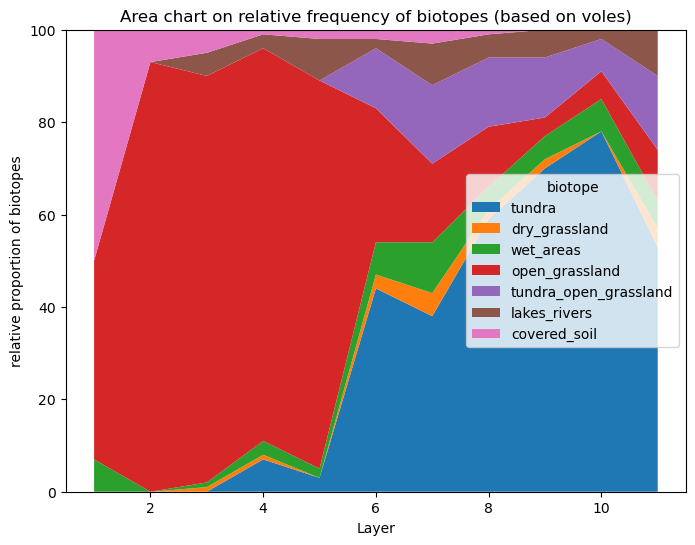

In [9]:
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.ylim([0,100])
plt.xlabel('Layer')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on voles)')
plt.legend(biotopes[2:],loc = 'center right',title = 'biotope')


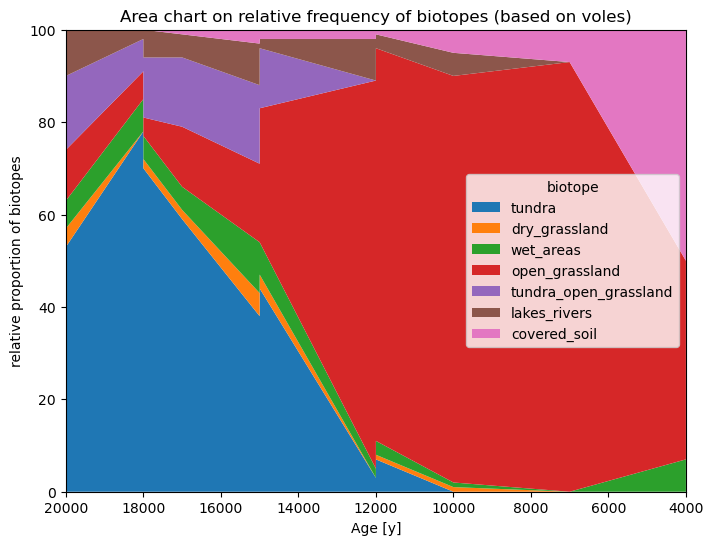

In [10]:
# area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on voles)')
plt.legend(biotopes[2:],loc = 'center right',title = 'biotope')

### 1.3 Assemblages of other vertebrates

In [11]:
table4 = "./data/Table4.csv"

data4names = np.genfromtxt(table4, delimiter = ',',names = True)
names_vert = list(data4names.dtype.names)
print(names_vert)

data_vert = np.genfromtxt(table4, delimiter = ',', skip_header = 1)
layer = data_vert[:,0]
age = data_vert[:,1]
data_sum_rel = np.cumsum(data_vert[:,2:],axis = 1)

['Layer', 'Age', 'Lacerta', 'Ophidia', 'Ochotona', 'Spermophilus_citellus', 'Sicista', 'Cricetulus', 'Apodemus']


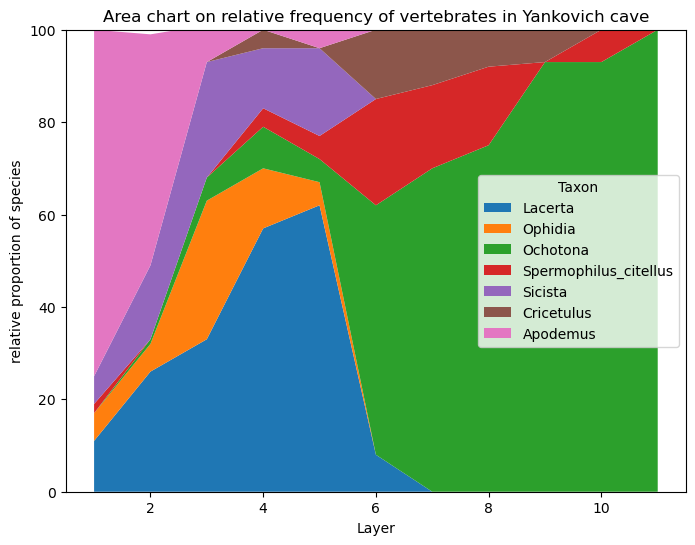

In [12]:
# area chart for layers
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of vertebrates in Yankovich cave')
plt.legend(names_vert[2:],loc = 'center right',title = 'Taxon')

#### Area chart for ages

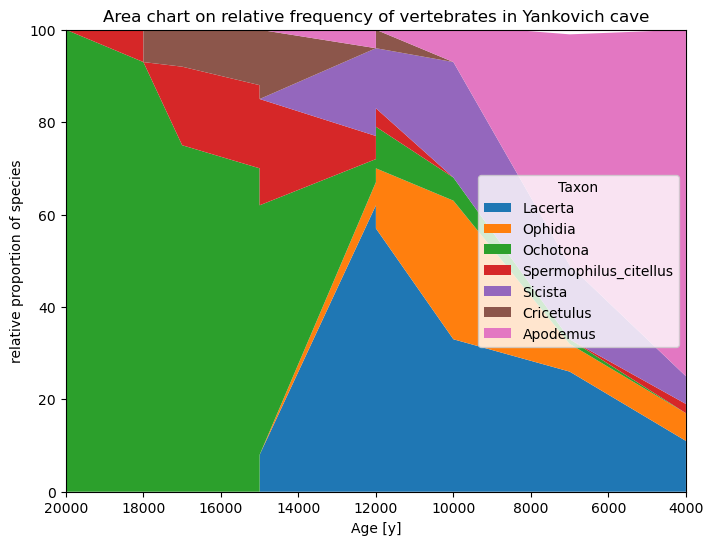

In [13]:
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of vertebrates in Yankovich cave')
plt.legend(names_vert[2:],loc = 'center right',title = 'Taxon')

Assemblages of biotopes based on other vertebrates

In [14]:
table4_biotopes = "./data/Table4_biotopes.csv"
biotopes_vert  = ['Layer','Age', 'dry_environment','steppe_grassland','short_grass_steppe','forest_steppe','forest_bushes']


In [15]:
# create adapted version of Table 4 for biotopes including summation of similar biotopes
data_vert_biotopes = np.copy(data_vert[:,:])
data_vert_biotopes[:,2] += data_vert_biotopes[:,3]
data_vert_biotopes[:,4] += data_vert_biotopes[:,6]
data_vert_biotopes = np.delete(data_vert_biotopes,[3,6], axis=1)
np.savetxt(table4_biotopes,data_vert_biotopes, delimiter = ',', header = ','.join(str(e) for e in biotopes_vert))

In [16]:
# read in data from adapted version of Table 4 for biotopes 
data_vert_biotopes = np.genfromtxt(table4_biotopes, delimiter = ',', skip_header = 1)
layer = data_vert_biotopes[:,0]
age = data_vert_biotopes[:,1]
data_sum_rel = np.cumsum(data_vert_biotopes[:,2:],axis = 1)

#### Area chart for sediment layers

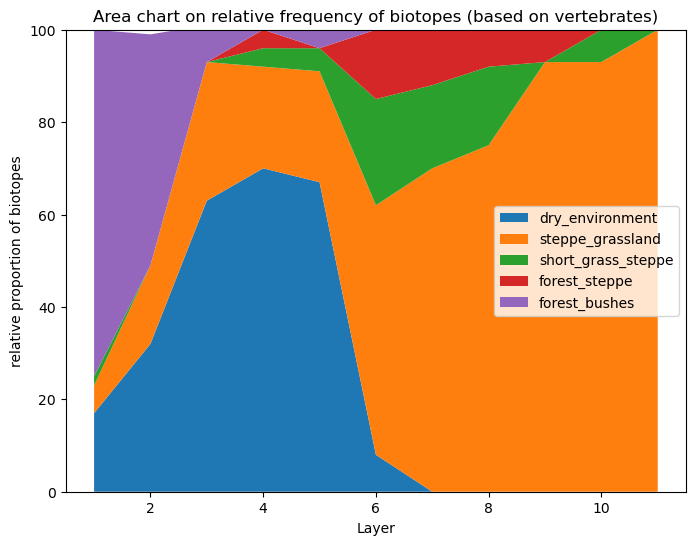

In [17]:
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 
#    plt.plot(age,data_sum_rel[:,i],'-o')

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on vertebrates)')
plt.legend(biotopes_vert[2:],loc = 'center right')

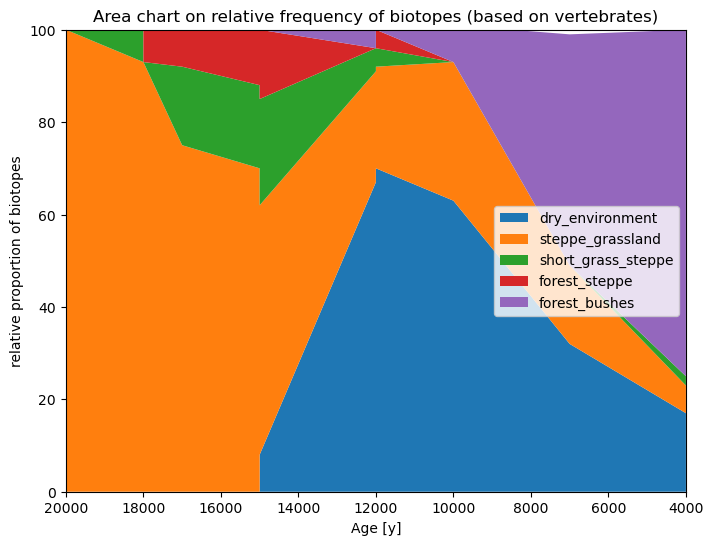

In [18]:
### area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 
#    plt.plot(age,data_sum_rel[:,i],'-o')

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on vertebrates)')
plt.legend(biotopes_vert[2:],loc = 'center right')


## 2. Taxonomic richness

Tables2.csv and Table4.csv contain taxa found in each layer in the cave. Make two bar plots, showing the species richness and genus richness across time. For that purpose, you need to generate a variable showing the number of species and genera, respectively, found in each layer. This will be the height of the bar (vertical axis).


In [19]:
species_voles = np.sum(data[:,2:]>0,axis = 1) # number of different voles species per layer
species_vertebrates = np.sum(data_vert[:,2:]>0,axis = 1) # number of different vertebrate species per layer
species = species_voles + species_vertebrates

Check if calculated correctly:

In [ ]:
print(species_voles)
print(species_vertebrates)
print(species)

In [20]:
data_genera_voles = np.zeros((len(layer),4))
data_genera_voles[:,[0,2,3]] = data[:,[2,8,9]]
data_genera_voles[:,1] = np.sum(data[:,3:8],axis=1)

#print(data_genera_voles)
#print(np.sum(data[:,2:],axis=1))
#print(np.sum(data_genera_voles,axis=1))

genera_voles = np.sum(data_genera_voles>0,axis = 1) 
print(genera_voles)

genera = genera_voles + species_vertebrates
print(genera)

[3 3 3 4 4 4 3 3 3 2 2]
[4 5 5 7 7 8 9 9 8 7 7]


Text(0.5, 1.0, 'Genera richness per layer in Yankovich cave')

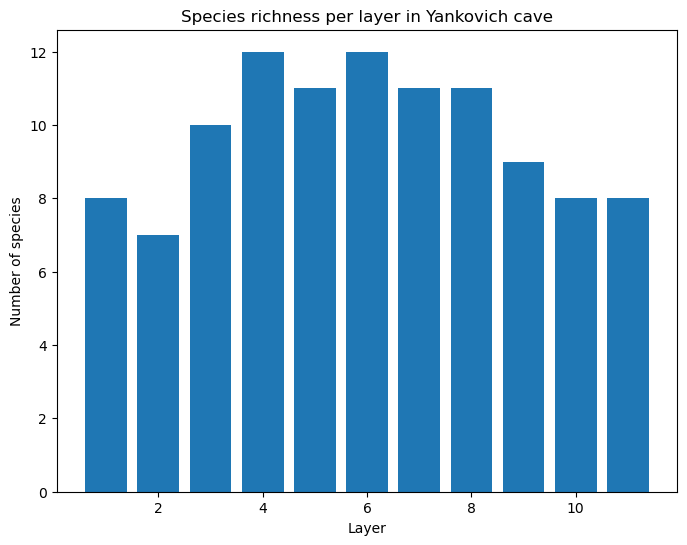

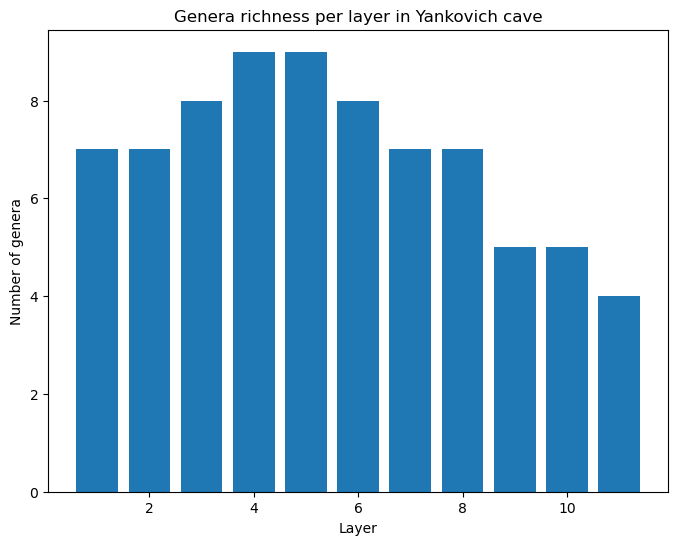

In [21]:
# taxonomic richness bar chart
plt.figure(figsize = [8,6])
plt.bar(layer,species)
plt.xlabel('Layer')
plt.ylabel('Number of species')
plt.title('Species richness per layer in Yankovich cave')

# taxonomic richness bar chart
plt.figure(figsize = [8,6])
plt.bar(layer,genera)
plt.xlabel('Layer')
plt.ylabel('Number of genera')
plt.title('Genera richness per layer in Yankovich cave')

## 3. Rank abundance curves
Rank abundance curves are used in ecology to show how balanced an ecosystem is: Is it dominated by one taxon or are there similar proportions of each taxa? Prepare a rank abundance curve for the Jankovich cave data. You can follows these steps: Sort the species based on how abundant they are in the fossil assemblage. [Useful commands np.sort() and np.argsort()] This has to be calculated for each layer in the cave. The most abundant taxon has the lowest rank (1) and the least abundant - the highest. Once you sorted the species based on abundance, you can make a plot where the rank is on the horizontal axis and the abundance on the vertical axis. Generate the plot one after another, in stratigraphic order, i.e. the oldest at the bottom. How did the ecosystem change over time? Did it go from less to more balanced or vice versa? 

Bonus task: this point requires making the same operations for each layer. Can you turn these operations into a function and apply it to all layers? This would make your code faster and less prone to mistakes.

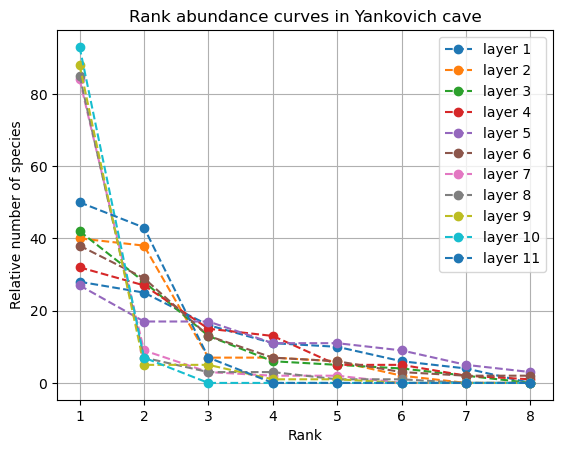

In [22]:
rank = np.arange(1,len(data[0,2:])+1,1)
for i in range(len(layer)):
    data_sort = np.sort(data[i,2:])[::-1]
    plt.plot(rank,data_sort,'o--',label = 'layer {}'.format(i+1))

plt.xlabel('Rank')
plt.ylabel('Relative number of species')
plt.title('Rank abundance curves in Yankovich cave')
plt.grid()
plt.legend()

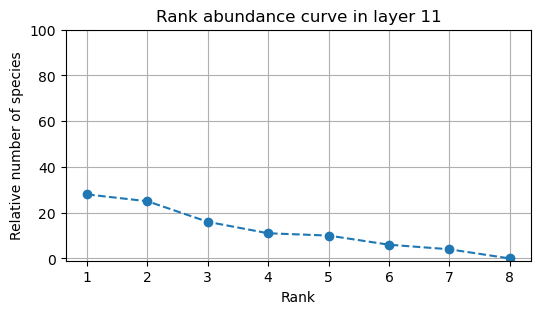

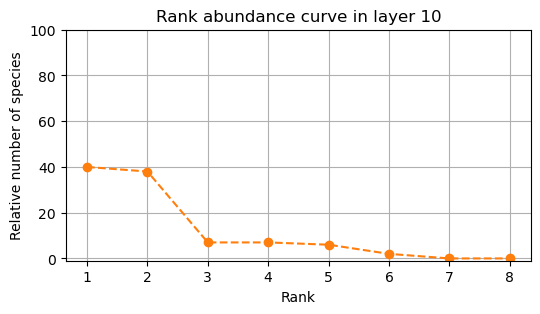

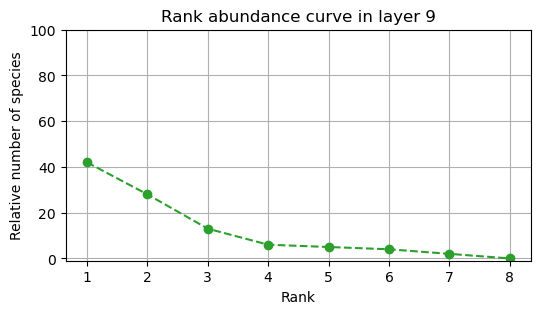

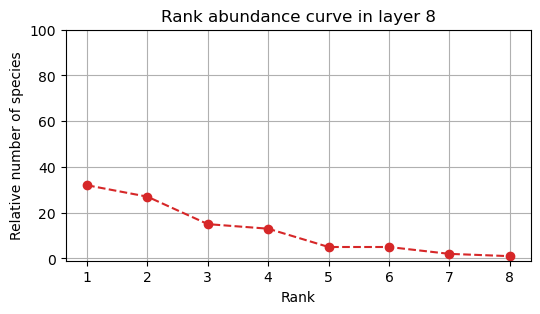

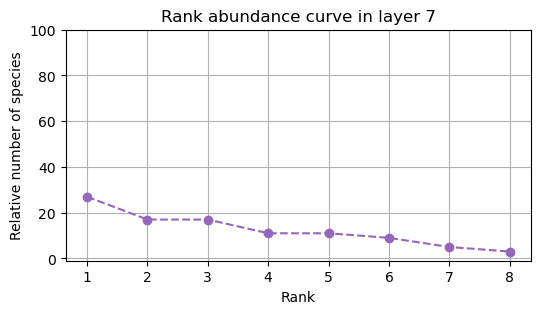

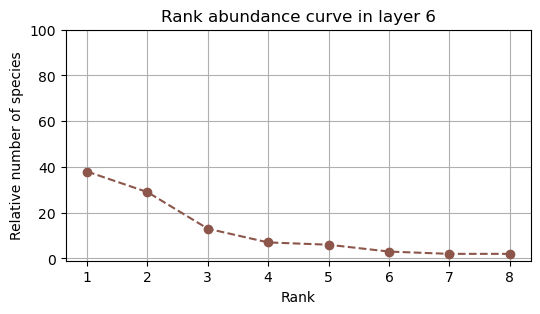

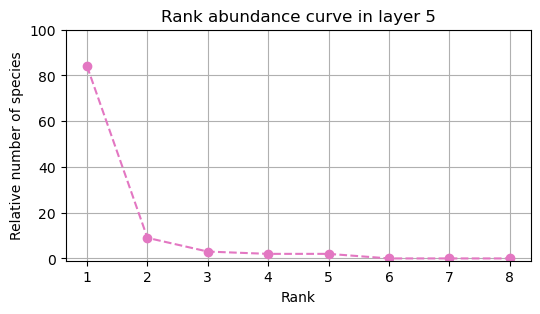

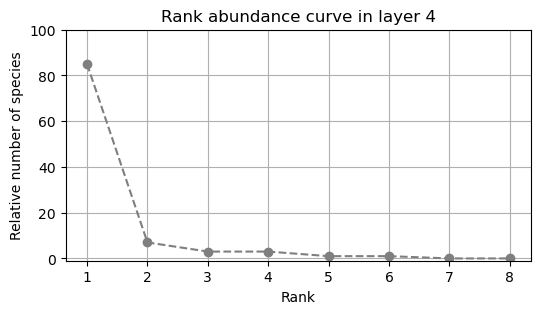

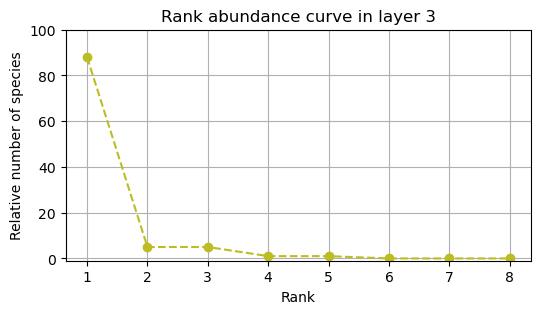

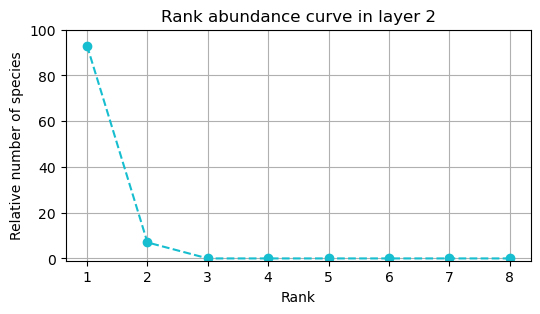

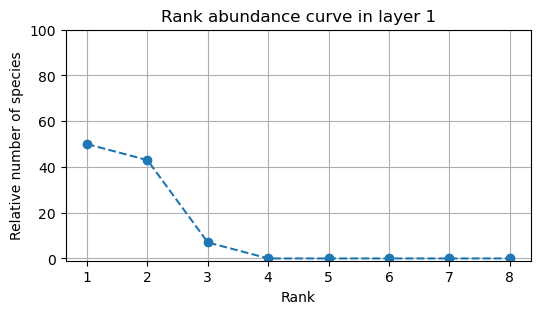

In [23]:
rank = np.arange(1,len(data[0,2:])+1,1)
for i in range(len(layer)):
    data_sort = np.sort(data[i,2:])[::-1]
    plt.figure(i,figsize = [6,3])
    plt.plot(rank,data_sort,'o--',c = 'C{}'.format(i))
    plt.ylim([-1,100])
    plt.xlabel('Rank')
    plt.ylabel('Relative number of species')
    plt.title('Rank abundance curve in layer {:.0f}'.format(layer[i]))
    plt.grid()

**Bonus** Transformation of code into function:

In [24]:
def rank_abundance(layer_data):

    """
    Function calculating the rank abundance for a given array of data.

    Input
    -----
    layer_data - relative abundance data 

    Output
    ------
    rank       -  array of rank value
    data_sort  -  abundance data sorted according to rank
    
    """

    nl = len(layer_data)
    rank = np.arange(1,nl+1,1)
    data_sort = np.sort(layer_data)[::-1]
    return rank,data_sort

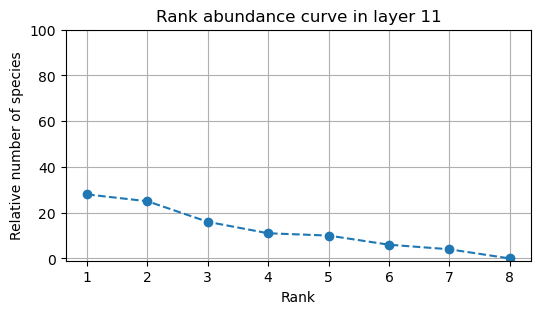

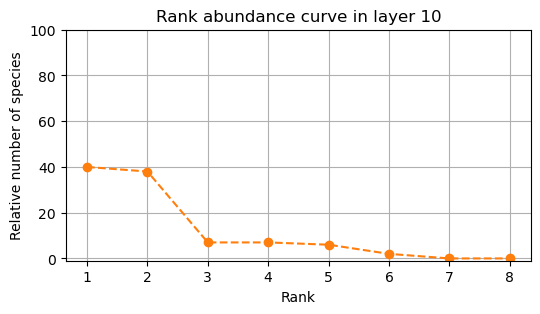

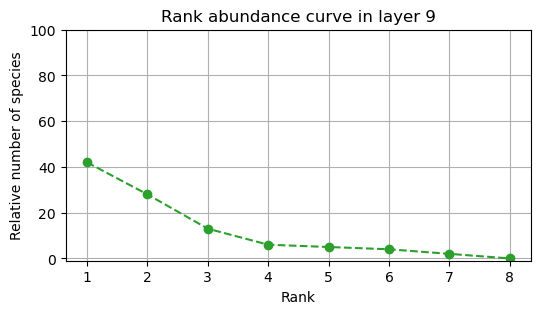

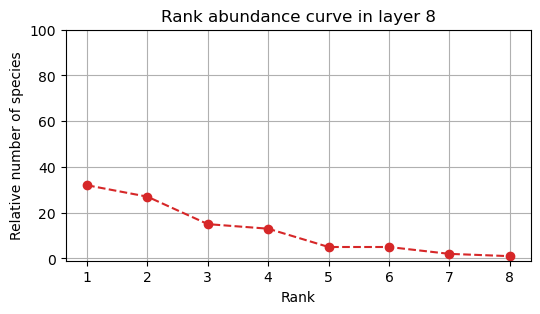

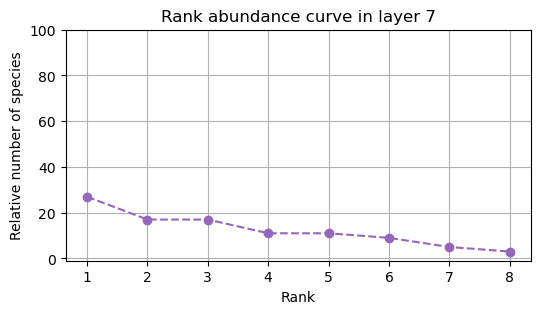

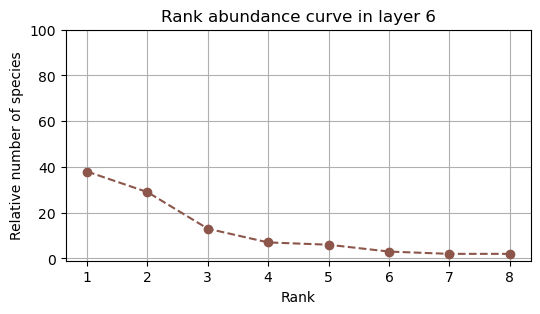

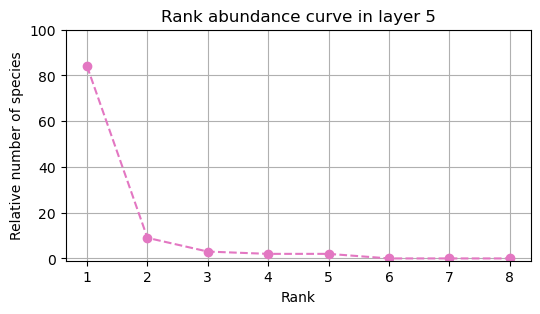

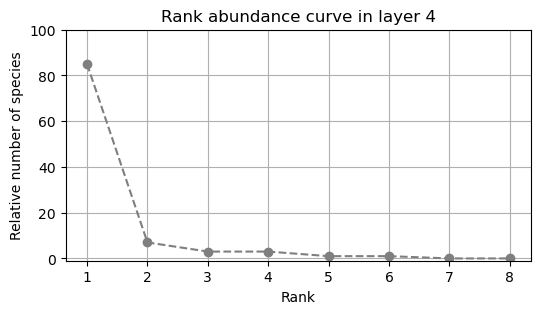

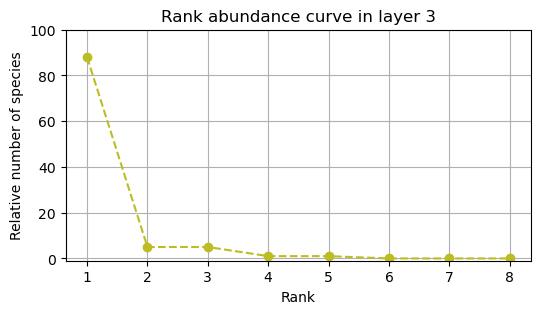

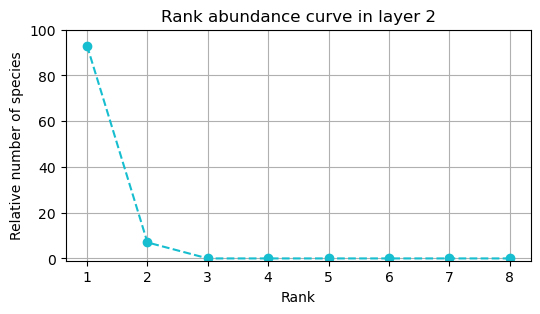

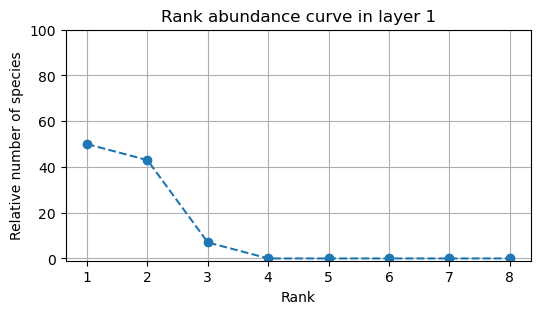

In [25]:
for i in range(len(layer)):
    rank,data_sort = rank_abundance(data[i,2:])
    plt.figure(i,figsize = [6,3])
    plt.plot(rank,data_sort,'o--',c = 'C{}'.format(i))
    plt.ylim([-1,100])
    plt.xlabel('Rank')
    plt.ylabel('Relative number of species')
    plt.title('Rank abundance curve in layer {:.0f}'.format(layer[i]))
    plt.grid()  

**Bonus** Transformation of code into function (alternative)

In [26]:
def rank_abundance_plot(layer_data):

    """
    Function which produces a plot of a rank abundance curve for a given array of data.

    Input
    -----
    layer_data - relative abundance data 

    Output
    ------
    (a plot)
    """
    
    nl = len(layer_data)
    rank = np.arange(1,nl+1,1)
    data_sort = np.sort(layer_data)[::-1]
    plt.figure(i,figsize = [6,3])
    plt.plot(rank,data_sort,'o--',c = 'C{}'.format(i))
    plt.ylim([-1,100])
    plt.xlabel('Rank')
    plt.ylabel('Relative number of species')
    plt.title('Rank abundance curve in layer {:.0f}'.format(layer[i]))
    plt.grid()

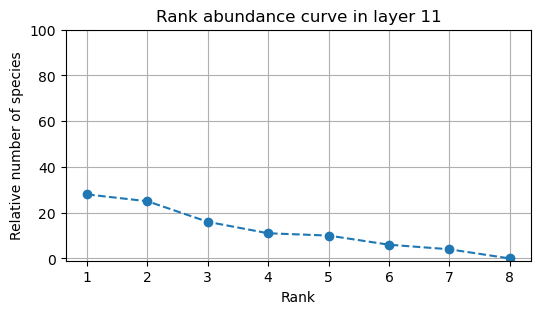

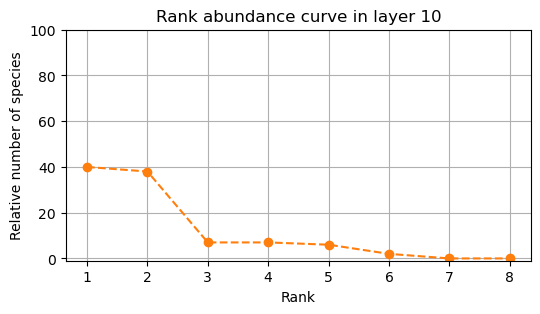

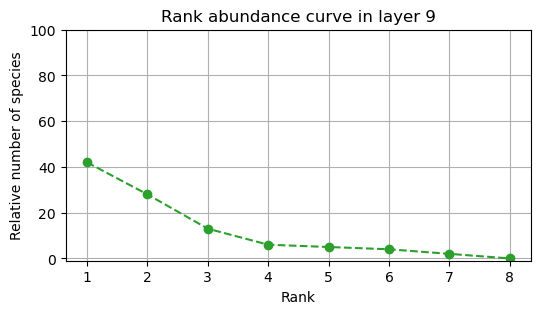

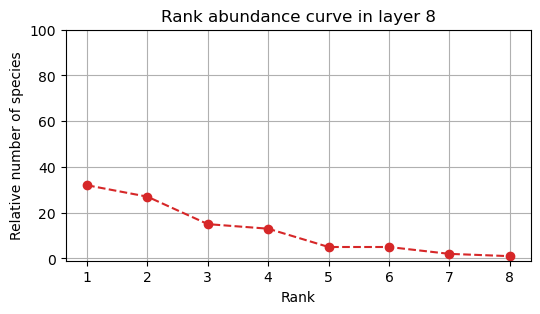

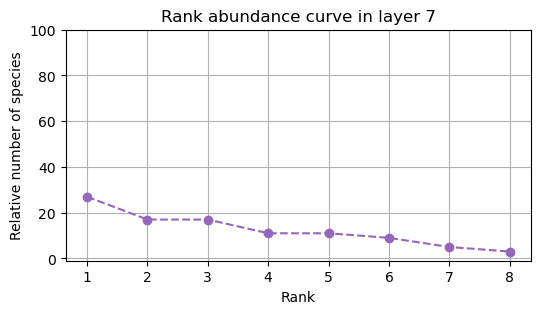

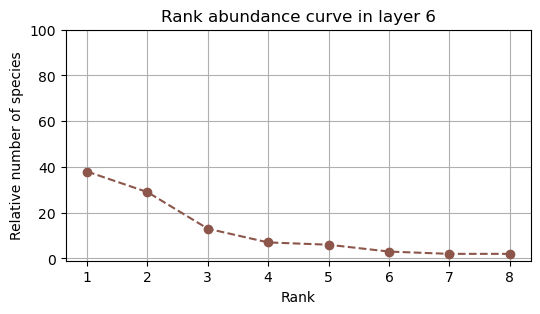

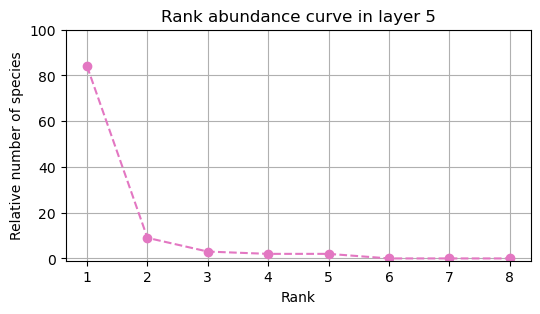

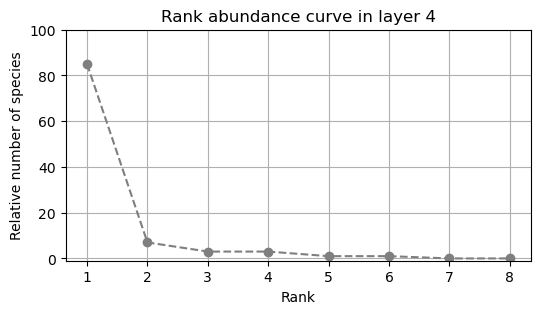

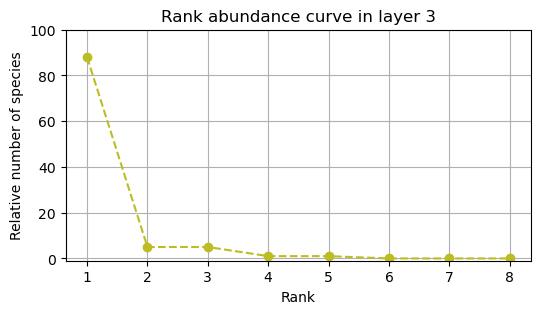

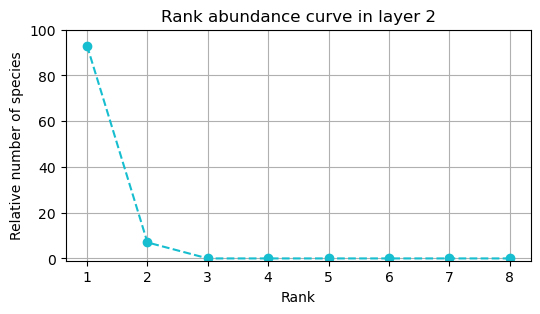

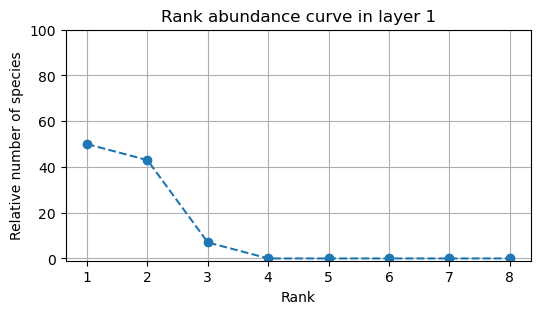

In [27]:
for i in range(len(layer)):
    layer_data = data[i,2:]
    rank_abundance_plot(layer_data)

## 4. Comparison with biomes from a climate model

In [28]:
import netCDF4 as nc4

climate_file = './data/LateQuaternary_Environment.nc'

## Read variables from NetCDF file
nc = nc4.Dataset(climate_file,'r')
longitude   = nc.variables['longitude'][:]
latitude    = nc.variables['latitude'][:]
years       = nc.variables['time'][:]
months      = nc.variables['month'][:]
temperature = nc.variables['temperature'][:]
biome       = nc.variables['biome'][:]

## Specify relevant point in time and space
my_year      = -20000    # 10,000 BP - ADAPT here!
my_longitude = 18.555731    # - ADAPT here! I used latlon of Bajot, Hungary
my_latitude  = 47.727139   # - ADAPT here!

LON,LAT = np.meshgrid(longitude,latitude)

# use nearest grid points (alternatively, use 3D interpolation)
lonID   = np.argmin(np.abs(longitude - my_longitude));
latID   = np.argmin(np.abs(latitude - my_latitude));
yearID  = np.argmin(np.abs(years - my_year));

print("Lon and lat grid IDs of the cave:",lonID,latID)

Lon and lat grid IDs of the cave: 397 215


### Mean annual temperature
Extract data from climate model: calculate mean annual temperature
(optional create csv-file with data to save)

Determine years relevant for cave data:

In [29]:
imin = np.argmin(abs(years+age[0])) # index in time series with earliest age in the cave
imax = np.argmin(abs(years+age[-1])) # index in time series with youngest age in the cave
print(years[imin],years[imax])

-20000 -4000


In [30]:
# Mean annual temperature time series
mean_annual_temperature = np.mean(temperature,axis=1)

years_cave = years[imin:imax+1]
temp_cave = mean_annual_temperature[imin:imax+1, latID, lonID]



In [31]:
file_mat = './data/MeanAnnualTemp.csv'

In [32]:
# data = np.vstack((years_cave,temp_cave)).T
# print(data.shape)
# np.savetxt(file_mat,data,delimiter = ',')

In [33]:
# data = np.loadtxt(file_mat,delimiter = ',')
# years_cave = data[:,0]
# temp_cave = data[:,1]

Text(0, 0.5, 'Temperature [C]')

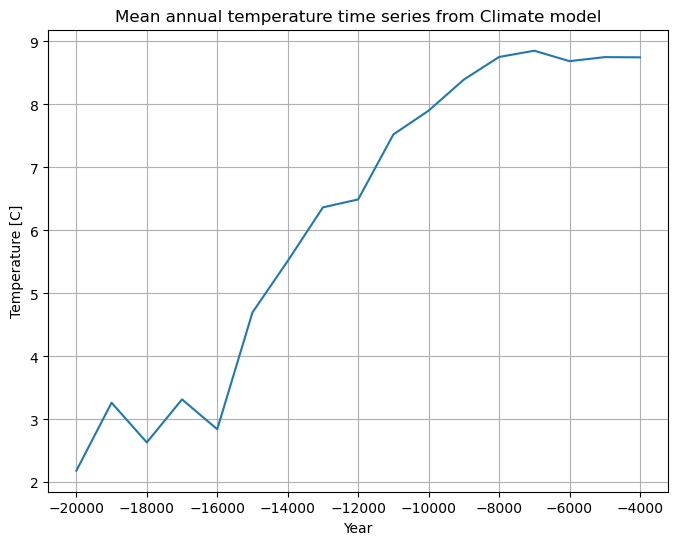

In [34]:
plt.figure(figsize = [8,6])
plt.plot(years_cave,temp_cave)
plt.grid(True)
plt.title('Mean annual temperature time series from Climate model')
plt.xlabel('Year')
plt.ylabel('Temperature [C]')

### Biome distribution Europe

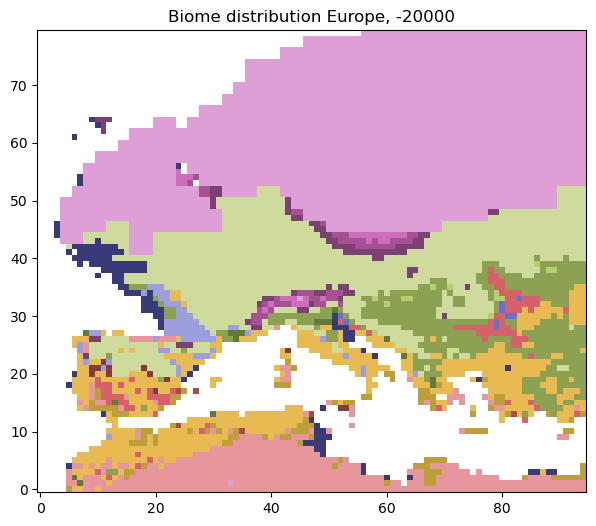

In [35]:
plt.figure(figsize = [8,6])
plt.imshow(biome[years == my_year,180:260,335:430].squeeze(),cmap = 'tab20b')
plt.title('Biome distribution Europe, {}'.format(my_year))
plt.gca().invert_yaxis()


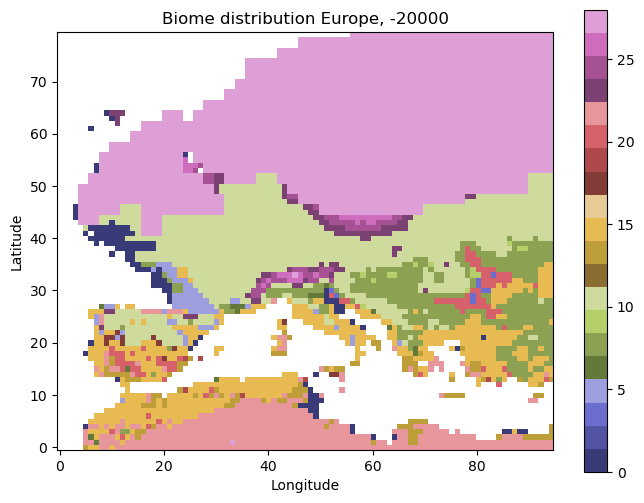

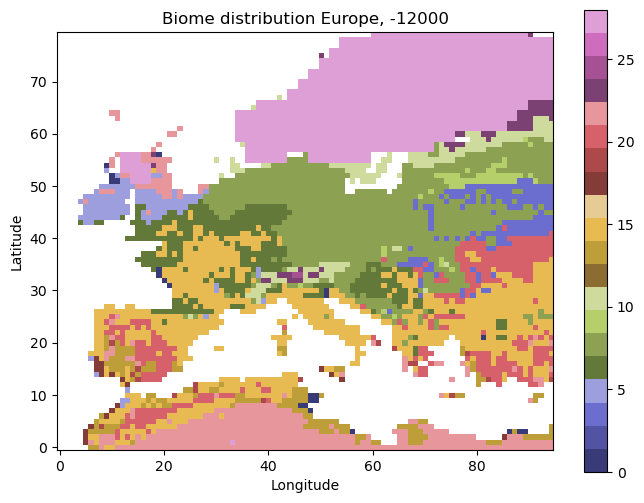

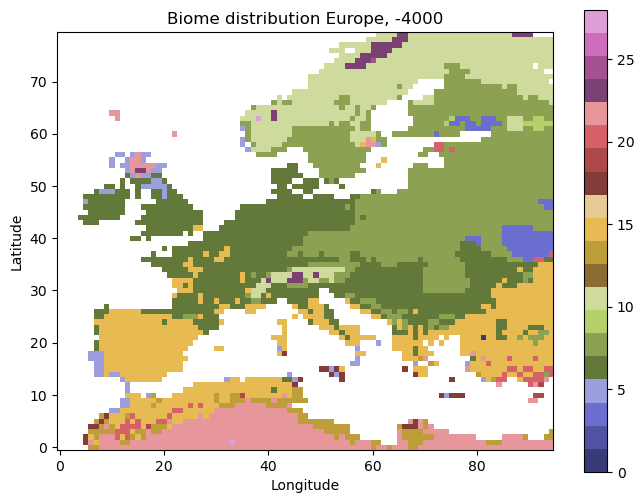

In [36]:
## biome map
for i,my_year in enumerate([-20000,-12000,-4000]):
    plt.figure(i,figsize = [8,6])
    plt.imshow(biome[years == my_year,180:260,335:430].squeeze(),cmap = 'tab20b')
    plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title('Biome distribution Europe, {}'.format(my_year))
    plt.gca().invert_yaxis()
